## <font color= 'green'>Data Description:</font>

### <font color='#FF4233'>traindata_with_target.csv:</font>
**date:** The timestamp at which the yield of the food processing farm was measured.

**farm_id:** The farm identifier that recognizes the farm food processing plant.

**ingredient_type:** The type of ingredient being produced.

**yield:** The yield of the plant in tonnes.

### <font color='#FF4233'>farm_data.csv:</font>
**farm_id:** The farm identifier that recognizes the farm food processing plant.

**founding_year:** The year when the operations commenced on the farm and food processing plant.

**num_processing_plants:** The number of processing plants present on the farm.

**farm_area:** The area of the farm in square meters.

**farming_company:** The company that owns the farms.

**deidentified_location:** The location at which the farm is present.

### <font color = '#FF4233'>train_weather.csv:</font>
**timestamp:** The time at which weather readings were taken.	

**deidentified_location:** The location at which weather readings were taken.

**temp_obs:** Temperature measured (units look like Celsius)	

**cloudiness:**  The state of the sky when it is covered by clouds (units <font color='#FF33F5'>Okta which means 8</font>).

(To understand what each value means, go to the link https://en.wikipedia.org/wiki/Okta)

**wind_direction:** The direction from which the wind originates. Wind direction is usually reported in degrees. Consequently, a wind blowing from the north has a wind direction referred to as 0° (360°); a wind blowing from the east has a wind direction referred to as 90°, etc.	

**dew_temp:** If the temperature of the air is reduced at constant pressure, at some particular temperature, the water vapour in the air starts to condense. This temperature is called dew point temperature. (units looks like Celsius)

**pressure_sea_level:** The sea level pressure is the atmospheric pressure at sea level at a given location. It is an indicator of weather. When a low-pressure system moves into an area, it usually leads to cloudiness, wind, and precipitation. High-pressure systems usually lead to fair, calm weather. 	

**precipitation:** The amount of rainfall forcasted.(in mm)

<u><font color= 'red'>Note:</font></u> When a particular area experiences more atmospheric evaporation than water downpour over a period of time, during that time, <font color='#FF33F5'>precipitation can be negative</font>.


**wind_speed:** The rate at which air is moving in a particular area. (can be in mph or kmph)

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline

In [4]:
train = pd.read_csv('traindata_without_target.csv')
farm = pd.read_csv('farm_data.csv')
weather = pd.read_csv('train_weather.csv')

In [5]:
print(f'Train data shape: {train.shape}')
print(f'Farm data shape: {farm.shape}')
print(f'Weather data shape: {weather.shape}')

Train data shape: (20216100, 3)
Farm data shape: (1449, 6)
Weather data shape: (139773, 9)


**The number of observations are too huge in train data**

In [6]:
train.head()

,date,farm_id,ingredient_type
0,2016-01-01 00:00:00,fid_110884,ing_w
1,2016-01-01 00:00:00,fid_90053,ing_w
2,2016-01-01 00:00:00,fid_17537,ing_w
3,2016-01-01 00:00:00,fid_110392,ing_w
4,2016-01-01 00:00:00,fid_62402,ing_w


In [7]:
farm.head()

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140120,Obery Farms,location 7369


In [8]:
weather.head()

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 01:00:00,location 7369,24.4,NaN,70.0,21.1,1020.2,-1.0,1.5
2,2016-01-01 02:00:00,location 7369,22.8,2.0,0.0,21.1,1020.2,0.0,0.0
3,2016-01-01 03:00:00,location 7369,21.1,2.0,0.0,20.6,1020.1,0.0,0.0
4,2016-01-01 04:00:00,location 7369,20.0,2.0,250.0,20.0,1020.0,-1.0,2.6


### Checking distribution of each column

In [9]:
for x in train.columns:
    print(f"Number of unique values of column -- '{x}' -- is: {train[x].nunique()} \n")
    print(f"Column -- {x} -- distribution in percentage:")
    print(round(train[x].value_counts()/train.shape[0] *100, 4))
    print('************************************')
    print('\n')

Number of unique values of column -- 'date' -- is: 8784 

Column -- date -- distribution in percentage:
2016-12-27 22:00:00    0.0117
2016-12-27 20:00:00    0.0117
2016-12-27 19:00:00    0.0117
2016-12-27 21:00:00    0.0117
2016-12-27 17:00:00    0.0117
                        ...  
2016-02-26 01:00:00    0.0093
2016-02-23 09:00:00    0.0093
2016-03-23 16:00:00    0.0090
2016-03-13 03:00:00    0.0087
2016-03-13 02:00:00    0.0077
Name: date, Length: 8784, dtype: float64
************************************


Number of unique values of column -- 'farm_id' -- is: 1434 

Column -- farm_id -- distribution in percentage:
fid_63700     0.2534
fid_68761     0.2064
fid_109814    0.1738
fid_103446    0.1738
fid_122174    0.1738
               ...  
fid_60652     0.0131
fid_118770    0.0115
fid_73322     0.0083
fid_20058     0.0050
fid_19864     0.0024
Name: farm_id, Length: 1434, dtype: float64
************************************


Number of unique values of column -- 'ingredient_type' -- is: 

**60% of the total production is of ingredient ing_w**

In [10]:
for x in farm.columns:
    print(f"Number of unique values of column -- '{x}' -- is: {farm[x].nunique()} \n")
    print(f"Column -- {x} -- distribution in percentage:")
    print(round(farm[x].value_counts()/farm.shape[0] *100, 4))
    print('************************************')
    print('\n')

Number of unique values of column -- 'farm_id' -- is: 1434 

Column -- farm_id -- distribution in percentage:
fid_71910    0.138
fid_18990    0.138
fid_81333    0.138
fid_68761    0.138
fid_53126    0.138
             ...  
fid_31715    0.069
fid_21039    0.069
fid_81706    0.069
fid_13316    0.069
fid_45834    0.069
Name: farm_id, Length: 1434, dtype: float64
************************************


Number of unique values of column -- 'operations_commencing_year' -- is: 116 

Column -- operations_commencing_year -- distribution in percentage:
1976.0    3.7957
1966.0    1.5873
1968.0    1.2422
1919.0    1.1732
1964.0    1.0352
           ...  
1934.0    0.0690
1936.0    0.0690
1926.0    0.0690
2017.0    0.0690
1947.0    0.0690
Name: operations_commencing_year, Length: 116, dtype: float64
************************************


Number of unique values of column -- 'num_processing_plants' -- is: 18 

Column -- num_processing_plants -- distribution in percentage:
5.0     7.5224
6.0     4.62

In [11]:
for x in weather.columns:
    print(f"Number of unique values of column -- '{x}' -- is: {weather[x].nunique()} \n")
    print(f"Column -- {x} -- distribution in percentage:")
    print(round(weather[x].value_counts()/weather.shape[0] *100, 4))
    print('************************************')
    print('\n')

Number of unique values of column -- 'timestamp' -- is: 8784 

Column -- timestamp -- distribution in percentage:
2016-08-26 00:00:00    0.0114
2016-10-11 10:00:00    0.0114
2016-06-18 19:00:00    0.0114
2016-11-19 04:00:00    0.0114
2016-05-11 04:00:00    0.0114
                        ...  
2016-09-29 08:00:00    0.0079
2016-03-23 13:00:00    0.0079
2016-03-23 01:00:00    0.0072
2016-03-23 00:00:00    0.0072
2016-01-01 00:00:00    0.0064
Name: timestamp, Length: 8784, dtype: float64
************************************


Number of unique values of column -- 'deidentified_location' -- is: 16 

Column -- deidentified_location -- distribution in percentage:
location 7369    6.2845
location 5677    6.2845
location 5833    6.2838
location 5489    6.2838
location 2532    6.2838
location 1784    6.2830
location 565     6.2830
location 5290    6.2816
location 8421    6.2816
location 5410    6.2795
location 959     6.2695
location 7048    6.2637
location 6364    6.2637
location 4525    6.1628

### Observations
* Train and farm data has a common feature, 'farm_id', with exact number of unique values.
* 'date' feature in train data, 'timestamp' feature in weather data has same number of unique values, and both are of year 2016,  and both are capturing recordings for every hour (366*24 = 8784) 
* Farm data and Weather data has a common feature 'deidentified_location', with exact number of unique values.

* These common features can be used while merging the data

### Checking dtypes

In [12]:
train.dtypes

date               object
farm_id            object
ingredient_type    object
dtype: object

In [13]:
farm.dtypes

farm_id                        object
operations_commencing_year    float64
num_processing_plants         float64
farm_area                     float64
farming_company                object
deidentified_location          object
dtype: object

In [14]:
weather.dtypes

timestamp                 object
deidentified_location     object
temp_obs                 float64
cloudiness               float64
wind_direction           float64
dew_temp                 float64
pressure_sea_level       float64
precipitation            float64
wind_speed               float64
dtype: object

### Checking Null Values

In [15]:
round(train.isna().mean()*100,2)

date               0.0
farm_id            0.0
ingredient_type    0.0
dtype: float64

In [16]:
round(farm.isna().mean()*100,2)

farm_id                        0.00
operations_commencing_year    53.42
num_processing_plants         75.50
farm_area                      0.00
farming_company                0.00
deidentified_location          0.00
dtype: float64

In [17]:
round(weather.isna().mean()*100,2)

timestamp                 0.00
deidentified_location     0.00
temp_obs                  0.04
cloudiness               49.49
wind_direction            4.48
dew_temp                  0.08
pressure_sea_level        7.60
precipitation            35.98
wind_speed                0.22
dtype: float64

**It's better to deal with null values after merging the data, because we don't the exact number of observations when the data is splitted.**

In [18]:
train.head()

,date,farm_id,ingredient_type
0,2016-01-01 00:00:00,fid_110884,ing_w
1,2016-01-01 00:00:00,fid_90053,ing_w
2,2016-01-01 00:00:00,fid_17537,ing_w
3,2016-01-01 00:00:00,fid_110392,ing_w
4,2016-01-01 00:00:00,fid_62402,ing_w


### Train and weather  has same dates but with different column names, renamimg them so that merging will be seamless

In [19]:
train.rename(columns= {'date': 'timestamp'}, inplace=True)

In [20]:
train.head()

,timestamp,farm_id,ingredient_type
0,2016-01-01 00:00:00,fid_110884,ing_w
1,2016-01-01 00:00:00,fid_90053,ing_w
2,2016-01-01 00:00:00,fid_17537,ing_w
3,2016-01-01 00:00:00,fid_110392,ing_w
4,2016-01-01 00:00:00,fid_62402,ing_w


### Checking and removing duplicates
* As the dataset is huge, by removing duplicates, we can reduce the computationally complexity and also while building a model, overfitting/underfitting can be reduced

In [21]:
train[train.duplicated()]

,timestamp,farm_id,ingredient_type
225,2016-01-01 00:00:00,fid_68761,ing_w
747,2016-01-01 00:00:00,fid_18990,ing_w
797,2016-01-01 00:00:00,fid_81333,ing_w
853,2016-01-01 00:00:00,fid_40459,ing_w
884,2016-01-01 00:00:00,fid_71910,ing_w
...,...,...,...
20215484,2016-12-31 23:00:00,fid_73431,ing_w
20215788,2016-12-31 23:00:00,fid_63700,ing_w
20215789,2016-12-31 23:00:00,fid_63700,ing_x
20215903,2016-12-31 23:00:00,fid_59158,ing_w


In [22]:
train.drop_duplicates(keep = 'first', inplace=True)

In [23]:
train[train.duplicated()]

,timestamp,farm_id,ingredient_type


In [24]:
farm[farm.duplicated()]

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location


In [25]:
weather[weather.duplicated()]

,timestamp,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed


## Merging the datasets
* We need to merge the datasets to understand the details of the farm_id, weather and also the actual mapings of the details based on farm_id, timestamp and deidentified_location.

In [26]:
print(f'Train data shape: {train.shape}')
print(f'Farm data shape: {farm.shape}')
print(f'Weather data shape: {weather.shape}')

Train data shape: (20080532, 3)
Farm data shape: (1449, 6)
Weather data shape: (139773, 9)


In [27]:
common_cols = []
for x in train.columns:
    if x in farm.columns:
        common_cols.append(x)
        
print(common_cols)

['farm_id']


### Merging train and farm data on common column farm_id using inner joins.
* I didn't want to use outer because I didn't want any joined observations which are having half of the features. Moreover, some of the features has half of the observations as null.

In [28]:
new_df = pd.merge(train,farm, on= common_cols, how = 'inner')

In [29]:
new_df.shape

(20331763, 8)

In [30]:
new_df.head()

,timestamp,farm_id,ingredient_type,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,2016-01-01 00:00:00,fid_110884,ing_w,2008.0,NaN,690.455096,Obery Farms,location 7369
1,2016-01-01 01:00:00,fid_110884,ing_w,2008.0,NaN,690.455096,Obery Farms,location 7369
2,2016-01-01 02:00:00,fid_110884,ing_w,2008.0,NaN,690.455096,Obery Farms,location 7369
3,2016-01-01 03:00:00,fid_110884,ing_w,2008.0,NaN,690.455096,Obery Farms,location 7369
4,2016-01-01 04:00:00,fid_110884,ing_w,2008.0,NaN,690.455096,Obery Farms,location 7369


In [31]:
new_df[new_df.duplicated()]

,timestamp,farm_id,ingredient_type,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location


In [32]:
new_df.columns

Index(['timestamp', 'farm_id', 'ingredient_type', 'operations_commencing_year',
       'num_processing_plants', 'farm_area', 'farming_company',
       'deidentified_location'],
      dtype='object')

In [33]:
weather.columns

Index(['timestamp', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

In [34]:
common_cols = []
for x in new_df.columns:
    if x in weather.columns:
        common_cols.append(x)
        
print(common_cols)

['timestamp', 'deidentified_location']


### Merging new_df and weather dataframes on the common columns 'timestamp', 'deidentified_location'

In [35]:
new_df.shape

(20331763, 8)

In [36]:
df = pd.merge(new_df,weather, on=common_cols, how = 'inner')

In [37]:
df.shape

(20241164, 15)

In [38]:
df[df.duplicated()]

,timestamp,farm_id,ingredient_type,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed


In [39]:
df.head()

,timestamp,farm_id,ingredient_type,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,1991.0,NaN,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,2002.0,NaN,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,1975.0,NaN,10833.140120,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [40]:
df.isna().mean() *100

timestamp                      0.000000
farm_id                        0.000000
ingredient_type                0.000000
operations_commencing_year    60.261490
num_processing_plants         82.623410
farm_area                      0.000000
farming_company                0.000000
deidentified_location          0.000000
temp_obs                       0.030566
cloudiness                    43.411258
wind_direction                 6.738723
dew_temp                       0.047828
pressure_sea_level             5.679194
precipitation                 18.129886
wind_speed                     0.263478
dtype: float64

### Removing 'operations_commencing_year', 'num_processing_plants' columns
* We don't have much data in operations_commencing_year, num_processing_plants to do imputation for missing values. Even if we impute, there won't be much variation in the data, and it won't be much help in our prediction.

In [41]:
df.drop(['operations_commencing_year', 'num_processing_plants'], axis = 1, inplace = True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20241164 entries, 0 to 20241163
Data columns (total 13 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   timestamp              object 
 1   farm_id                object 
 2   ingredient_type        object 
 3   farm_area              float64
 4   farming_company        object 
 5   deidentified_location  object 
 6   temp_obs               float64
 7   cloudiness             float64
 8   wind_direction         float64
 9   dew_temp               float64
 10  pressure_sea_level     float64
 11  precipitation          float64
 12  wind_speed             float64
dtypes: float64(8), object(5)
memory usage: 2.1+ GB


In [43]:
pd.set_option('max_colwidth', 20)
df.describe()

,farm_area,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
count,2.024116e+07,2.023498e+07,1.145422e+07,1.887717e+07,2.023148e+07,1.909163e+07,1.657146e+07,2.018783e+07
mean,9.984825e+03,1.597831e+01,1.902980e+00,1.730822e+02,7.740456e+00,1.016086e+03,7.956434e-01,3.379662e+00
std,1.086972e+04,1.094846e+01,2.404024e+00,1.140447e+02,1.017913e+01,7.060099e+00,7.462162e+00,2.266350e+00
min,2.629155e+01,-2.890000e+01,0.000000e+00,0.000000e+00,-3.500000e+01,9.682000e+02,-1.000000e+00,0.000000e+00
25%,2.996679e+03,8.500000e+00,0.000000e+00,7.000000e+01,0.000000e+00,1.011600e+03,0.000000e+00,2.100000e+00
50%,6.706946e+03,1.670000e+01,0.000000e+00,1.800000e+02,8.900000e+00,1.016000e+03,0.000000e+00,3.100000e+00
75%,1.291138e+04,2.390000e+01,4.000000e+00,2.800000e+02,1.610000e+01,1.020500e+03,0.000000e+00,4.600000e+00
max,8.129012e+04,4.720000e+01,9.000000e+00,3.600000e+02,2.610000e+01,1.045500e+03,3.430000e+02,1.900000e+01


In [44]:
df.describe(include='object')

,timestamp,farm_id,ingredient_type,farming_company,deidentified_location
count,20241164,20241164,20241164,20241164,20241164
unique,8784,1434,4,16,16
top,2016-12-27 22:00:00,fid_63700,ing_w,Obery Farms,location 2532
freq,2383,70178,12027434,8163691,2746587


### To reduce momory usage, restructuring the data in a few columns

In [45]:
farm_unique = list(df['farm_id'].unique())

In [46]:
for x in range(len(farm_unique)):
    if farm_unique[x][0:4] != 'fid_':
        print(x)
        
# for all the farm ids, first four characters are fid_

In [47]:
df['farm_id'] = df['farm_id'].apply(lambda x: x[4:])

In [48]:
location_unique = list(df['deidentified_location'].unique())

In [49]:
for x in range(len(location_unique)):
    if location_unique[x][0:9] != 'location ':
        print(x)
        
# for all the locations, first 9 characters are fid_

In [50]:
df['deidentified_location'] = df['deidentified_location'].apply(lambda x: x[9:])

In [51]:
df.head()

,timestamp,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,110884,ing_w,690.455096,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,90053,ing_w,252.696160,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01 00:00:00,17537,ing_w,499.446528,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01 00:00:00,110392,ing_w,2200.407555,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01 00:00:00,62402,ing_w,10833.140120,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [52]:
print(location_unique)

['location 7369', 'location 6364', 'location 959', 'location 5489', 'location 2532', 'location 5290', 'location 5833', 'location 5677', 'location 5150', 'location 7048', 'location 565', 'location 4525', 'location 8421', 'location 5410', 'location 1784', 'location 868']


In [53]:
df['deidentified_location'].unique()

array(['7369', '6364', '959', '5489', '2532', '5290', '5833', '5677',
       '5150', '7048', '565', '4525', '8421', '5410', '1784', '868'],
      dtype=object)

In [54]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [55]:
df['timestamp']

0          2016-01-01 00:00:00
1          2016-01-01 00:00:00
2          2016-01-01 00:00:00
3          2016-01-01 00:00:00
4          2016-01-01 00:00:00
                   ...        
20241159   2016-12-17 06:00:00
20241160   2016-12-17 06:00:00
20241161   2016-12-17 06:00:00
20241162   2016-12-17 06:00:00
20241163   2016-12-17 06:00:00
Name: timestamp, Length: 20241164, dtype: datetime64[ns]

In [56]:
df.head()

,timestamp,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,110884,ing_w,690.455096,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01,90053,ing_w,252.696160,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01,17537,ing_w,499.446528,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01,110392,ing_w,2200.407555,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01,62402,ing_w,10833.140120,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20241164 entries, 0 to 20241163
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   timestamp              datetime64[ns]
 1   farm_id                object        
 2   ingredient_type        object        
 3   farm_area              float64       
 4   farming_company        object        
 5   deidentified_location  object        
 6   temp_obs               float64       
 7   cloudiness             float64       
 8   wind_direction         float64       
 9   dew_temp               float64       
 10  pressure_sea_level     float64       
 11  precipitation          float64       
 12  wind_speed             float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 2.1+ GB


### Saving the dataframe to csv, so that we can call it directly, no need to run the entire code again and we can save our computational power.

In [58]:
#df.to_csv('final_merged_data.csv', index = False)

In [59]:
df.shape

(20241164, 13)

In [60]:
df.head()

,timestamp,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01,110884,ing_w,690.455096,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01,90053,ing_w,252.696160,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01,17537,ing_w,499.446528,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01,110392,ing_w,2200.407555,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01,62402,ing_w,10833.140120,Obery Farms,7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20241164 entries, 0 to 20241163
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   timestamp              datetime64[ns]
 1   farm_id                object        
 2   ingredient_type        object        
 3   farm_area              float64       
 4   farming_company        object        
 5   deidentified_location  object        
 6   temp_obs               float64       
 7   cloudiness             float64       
 8   wind_direction         float64       
 9   dew_temp               float64       
 10  pressure_sea_level     float64       
 11  precipitation          float64       
 12  wind_speed             float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 2.1+ GB


In [62]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [63]:
df[['farm_id', 'deidentified_location']] = df[['farm_id', 'deidentified_location']].astype('object')

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20241164 entries, 0 to 20241163
Data columns (total 13 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   timestamp              datetime64[ns]
 1   farm_id                object        
 2   ingredient_type        object        
 3   farm_area              float64       
 4   farming_company        object        
 5   deidentified_location  object        
 6   temp_obs               float64       
 7   cloudiness             float64       
 8   wind_direction         float64       
 9   dew_temp               float64       
 10  pressure_sea_level     float64       
 11  precipitation          float64       
 12  wind_speed             float64       
dtypes: datetime64[ns](1), float64(8), object(4)
memory usage: 2.1+ GB


In [65]:
df = df.sort_values(['timestamp'])

### Vizualization before imputation

Wall time: 10.8 s


<AxesSubplot:>

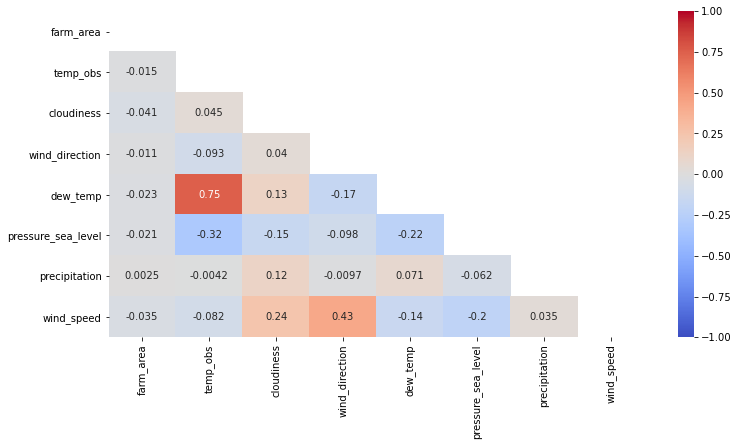

In [66]:
%%time

cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,6))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

#### Dew temperature and temperature has high linear correlation

In [67]:
def barplot(x,df):
    plt.figure(figsize = (20,6))
    bar_plot1 = sns.countplot(x=x, data=df)
    plt.xticks(rotation = 45)
    for p in bar_plot1.patches:
        height = p.get_height()
        bar_plot1.text(p.get_x()+ p.get_width()/3, height + 1, f'{round(height/len(df) *100,3)} %')
        
    

In [68]:
df.columns

Index(['timestamp', 'farm_id', 'ingredient_type', 'farm_area',
       'farming_company', 'deidentified_location', 'temp_obs', 'cloudiness',
       'wind_direction', 'dew_temp', 'pressure_sea_level', 'precipitation',
       'wind_speed'],
      dtype='object')

### Univariate analysis

Wall time: 24.4 s


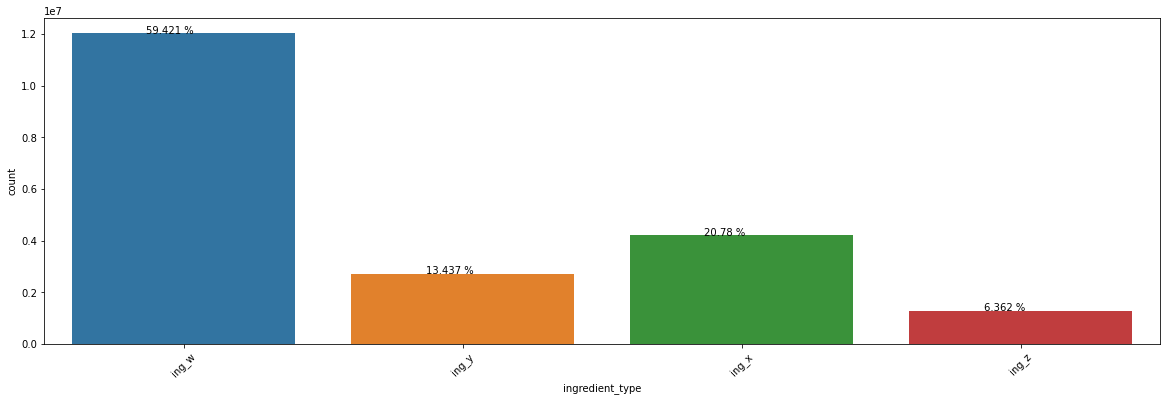

In [69]:
%%time
barplot('ingredient_type', df)

**ing_w is harvested on majority of the farms** 

Wall time: 19.9 s


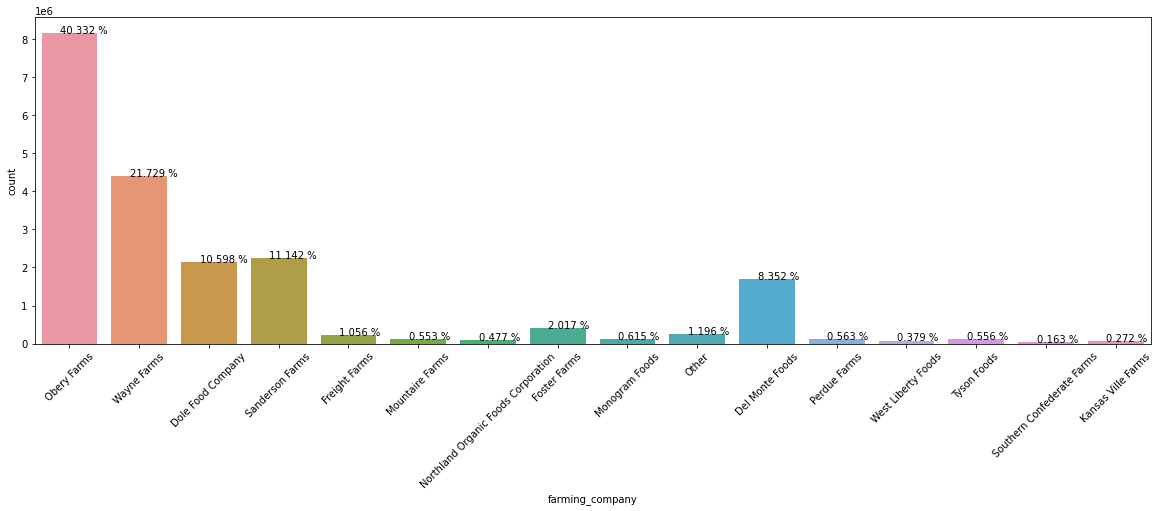

In [70]:
%%time
barplot('farming_company', df)

**Majority of the harvested crop is processed at Obery Farms**

Wall time: 25.7 s


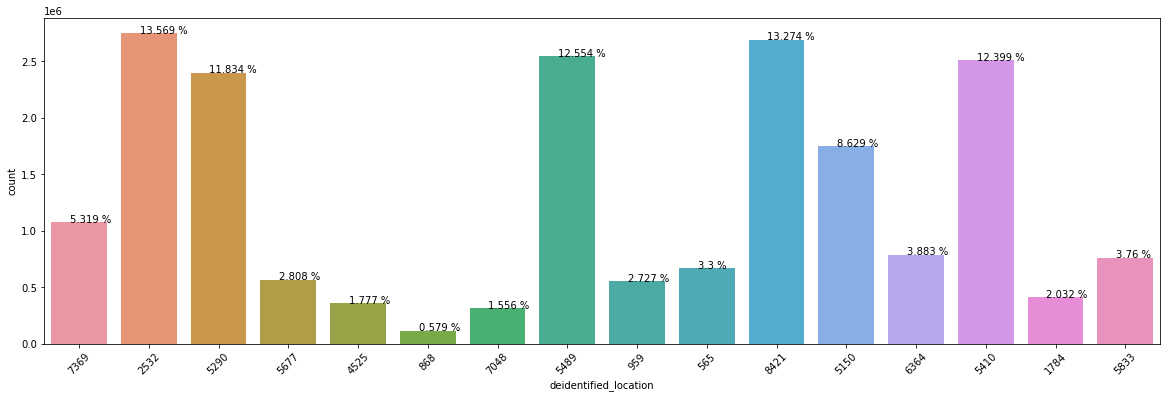

In [71]:
%%time
barplot('deidentified_location', df)

**There is no one particular location at which most of the data is observed.**

Wall time: 5min 36s


<AxesSubplot:xlabel='farm_area', ylabel='Density'>

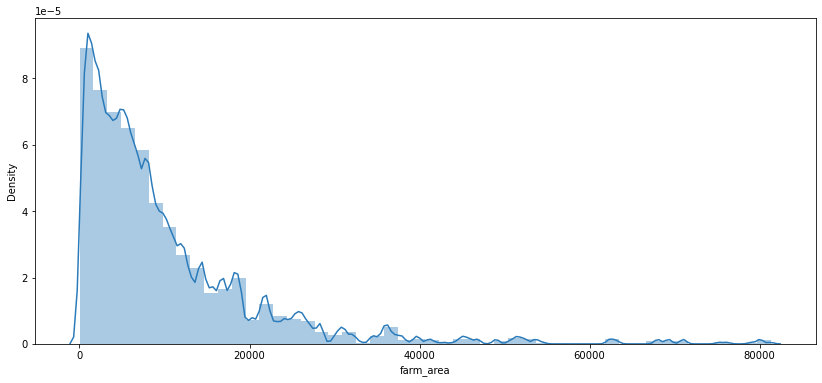

In [73]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['farm_area'],  kde = True, color= '#2b7bba')

**Farm are is right skewed**

Wall time: 5min 12s


<AxesSubplot:xlabel='temp_obs', ylabel='Density'>

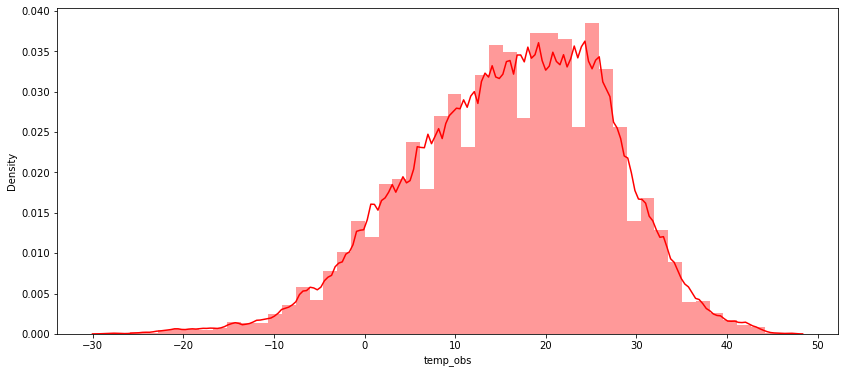

In [74]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['temp_obs'],  kde = True, color= 'red')

**Some of the locations have recoreded high negative temperatures.**

Wall time: 2min 31s


<AxesSubplot:xlabel='cloudiness', ylabel='Density'>

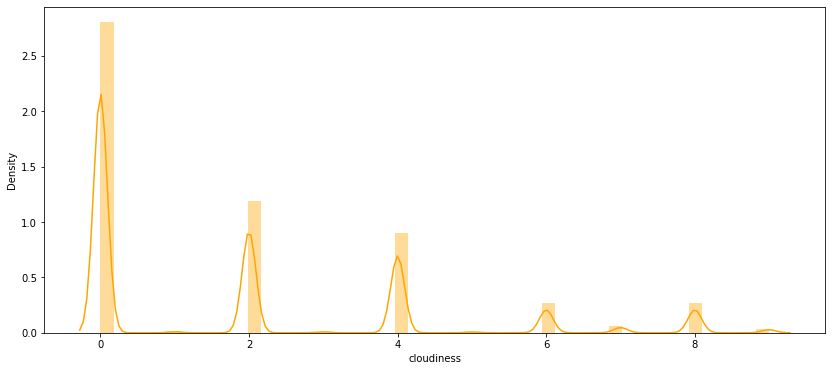

In [75]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['cloudiness'],  kde = True, color= 'orange')

**Cloudiness is measured in integers, where most of the observations are even.**

Wall time: 3min 44s


<AxesSubplot:xlabel='wind_direction', ylabel='Density'>

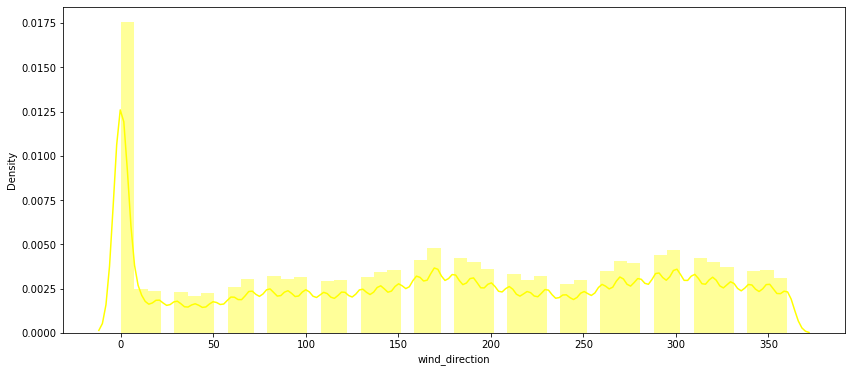

In [76]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['wind_direction'],  kde = True, color= 'yellow')

**Most of times wind direction is at 0 degress, most of the times wind is blowing from the North.** 

Wall time: 5min 1s


<AxesSubplot:xlabel='dew_temp', ylabel='Density'>

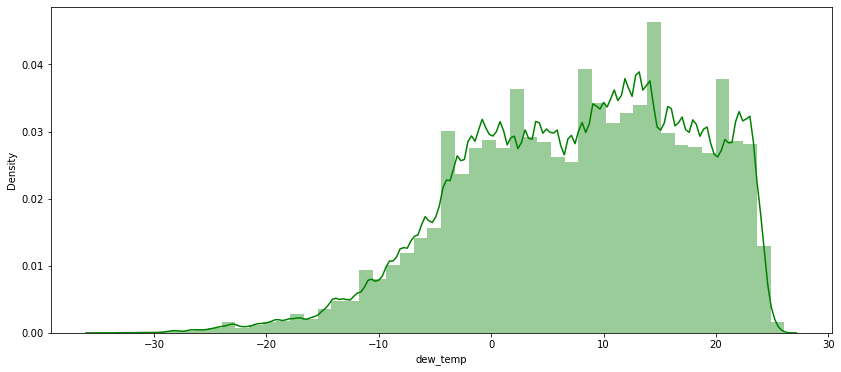

In [77]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['dew_temp'],  kde = True, color= 'green')

Wall time: 5min 19s


<AxesSubplot:xlabel='pressure_sea_level', ylabel='Density'>

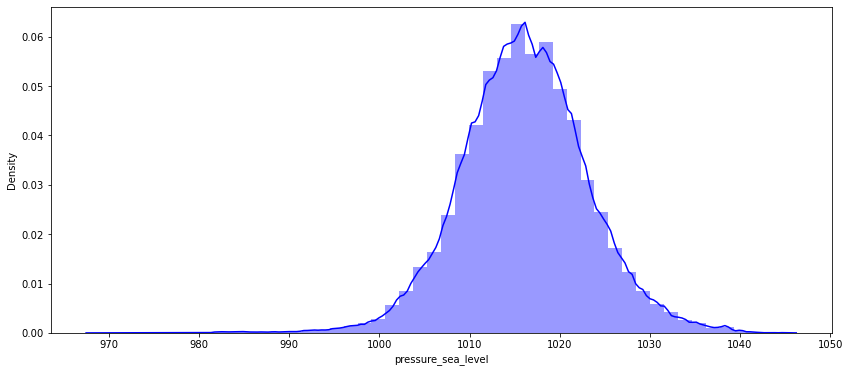

In [78]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['pressure_sea_level'],  kde = True, color= 'blue')

**Sea Pressure Level observations are nearly normally distributed.**

Wall time: 830 ms


<AxesSubplot:xlabel='precipitation'>

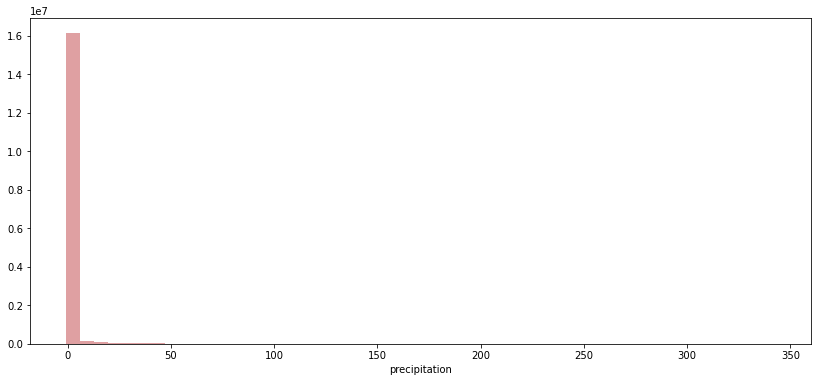

In [79]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['precipitation'],  kde = False, color= '#b11218')

**Most of the observations are at 0.**

Wall time: 5min 29s


<AxesSubplot:xlabel='wind_speed', ylabel='Density'>

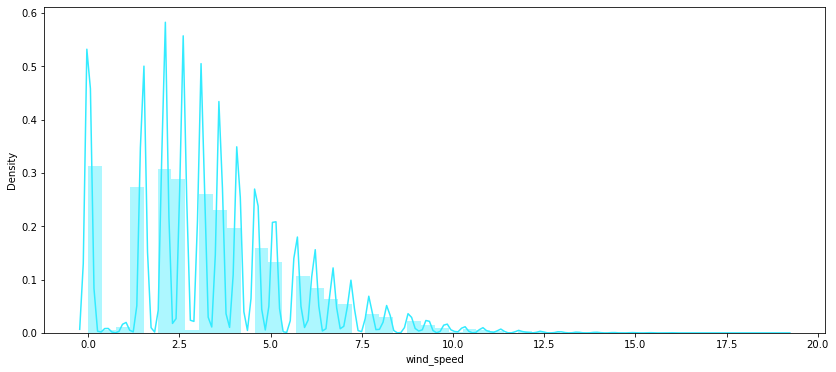

In [80]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(df['wind_speed'],  kde = True, color= '#33EBFF')

### Visualizing the observations at location 4525

* Plotting every point in the given dataframe is computationally is not possible, and also the weather forcast changes from place to place, so it won't be of much use even if we plot on the entire data. 

In [81]:
L4525 = df[(df['deidentified_location'] == '4525')]
L4525

,timestamp,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
14154807,2016-01-01 00:00:00,39121,ing_y,48999.922190,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,NaN,1.5
14154806,2016-01-01 00:00:00,39121,ing_x,48999.922190,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,NaN,1.5
14154805,2016-01-01 00:00:00,39121,ing_w,48999.922190,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,NaN,1.5
14154804,2016-01-01 00:00:00,42338,ing_y,37999.928280,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,NaN,1.5
14154803,2016-01-01 00:00:00,42338,ing_x,37999.928280,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,NaN,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508237,2016-12-31 23:00:00,65870,ing_x,5999.954449,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.0,4.1
14508236,2016-12-31 23:00:00,65870,ing_w,5999.954449,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.0,4.1
14508235,2016-12-31 23:00:00,39121,ing_y,48999.922190,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.0,4.1
14508234,2016-12-31 23:00:00,39121,ing_x,48999.922190,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.0,4.1


In [82]:
L4525.shape

(359642, 13)

Wall time: 575 ms


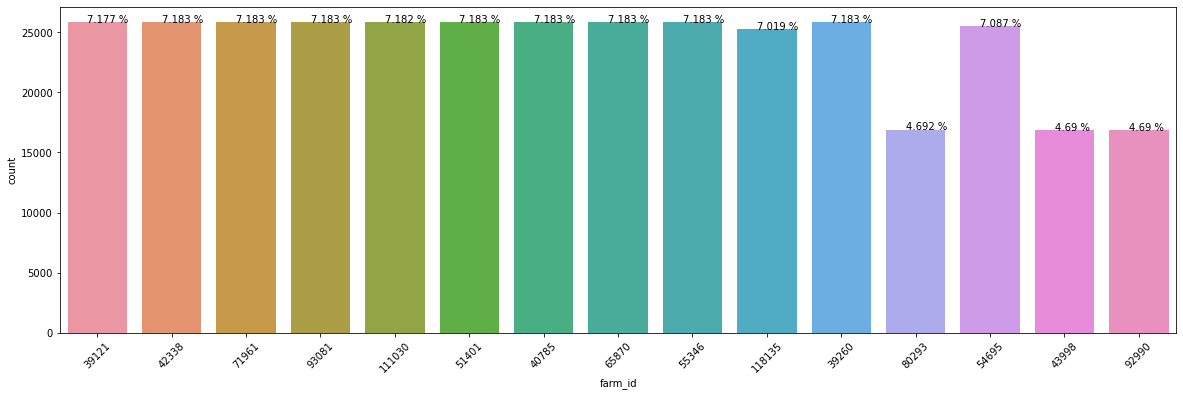

In [83]:
%%time

barplot('farm_id', L4525)

Wall time: 280 ms


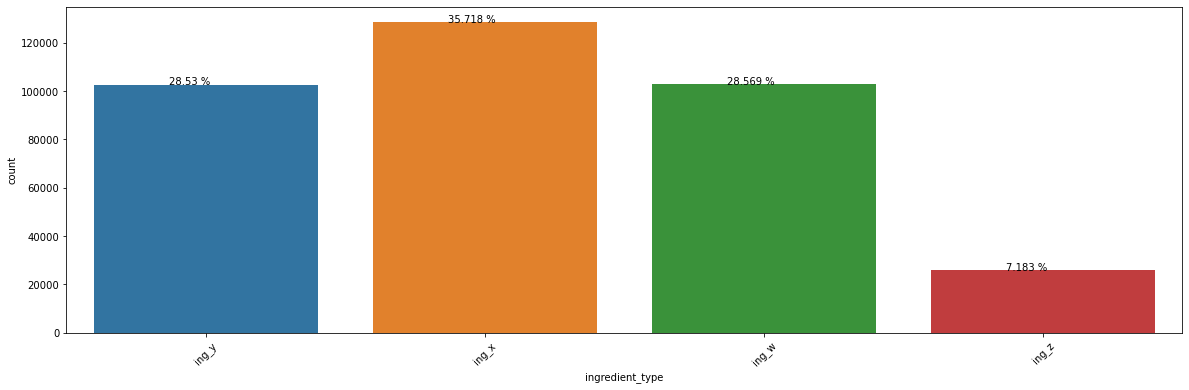

In [84]:
%%time

barplot('ingredient_type', L4525)

Wall time: 389 ms


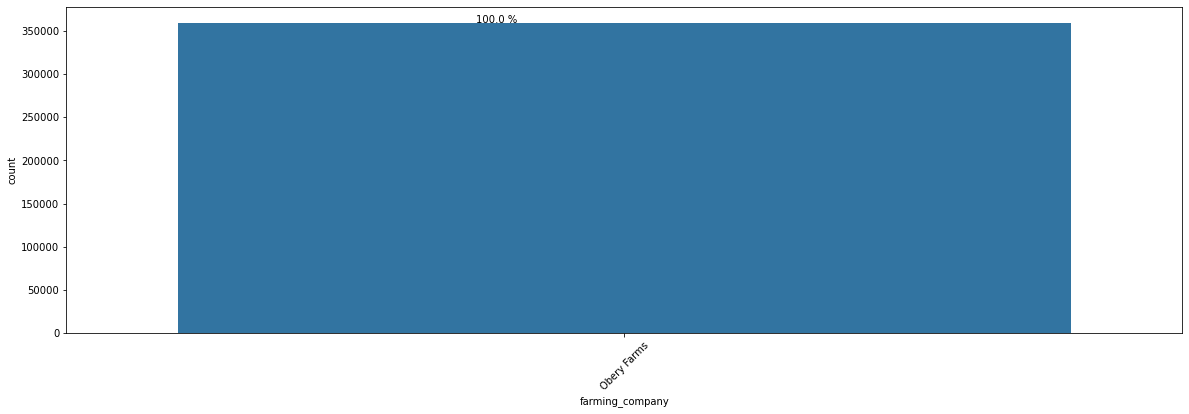

In [85]:
%%time

barplot('farming_company', L4525)

Wall time: 2.64 s


<AxesSubplot:xlabel='farm_area', ylabel='Density'>

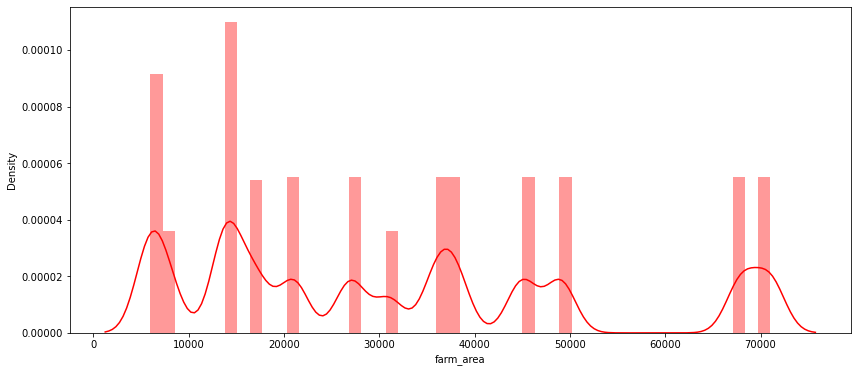

In [86]:
%%time

fig = plt.figure(figsize=(14,6))
sns.distplot(L4525['farm_area'],  kde = True, color= 'red')

Wall time: 6min 49s


<AxesSubplot:xlabel='timestamp', ylabel='temp_obs'>

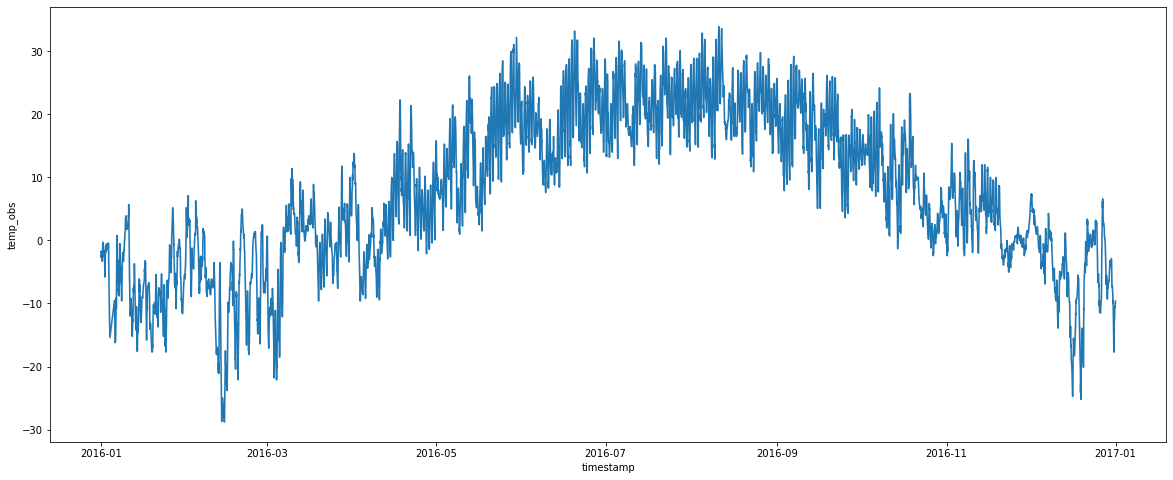

In [87]:
%%time
plt.figure(figsize = (20,8))
sns.lineplot(x = 'timestamp', y = 'temp_obs', data = L4525);

In [88]:
L4525['cloudiness'].isna().sum()

359642

Wall time: 6min 24s


<AxesSubplot:xlabel='timestamp'>

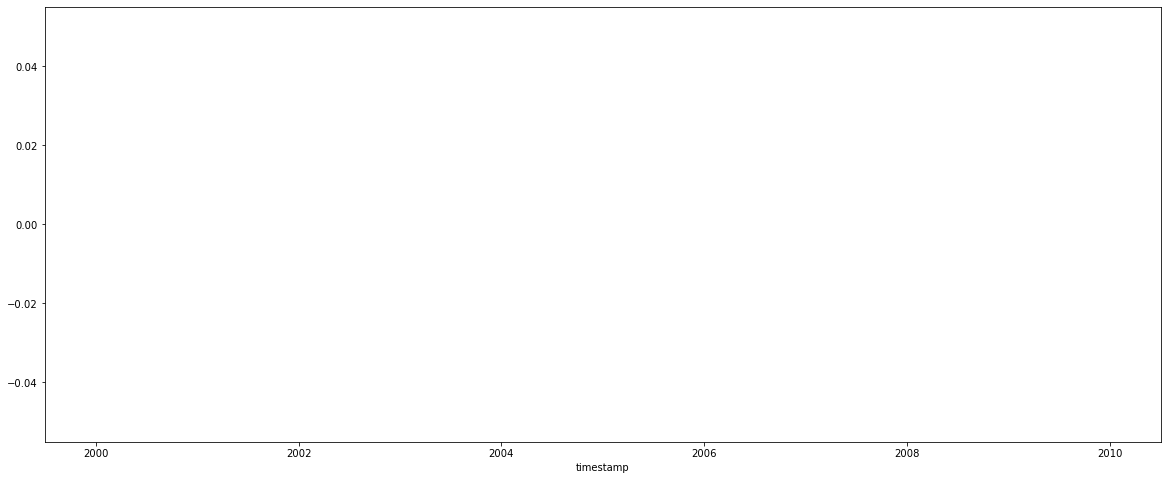

In [89]:
%%time
plt.figure(figsize = (20,8))
sns.lineplot(x = 'timestamp', y = 'cloudiness', data = L4525);

# All values are null 

Wall time: 32.6 s


<AxesSubplot:xlabel='timestamp', ylabel='precipitation'>

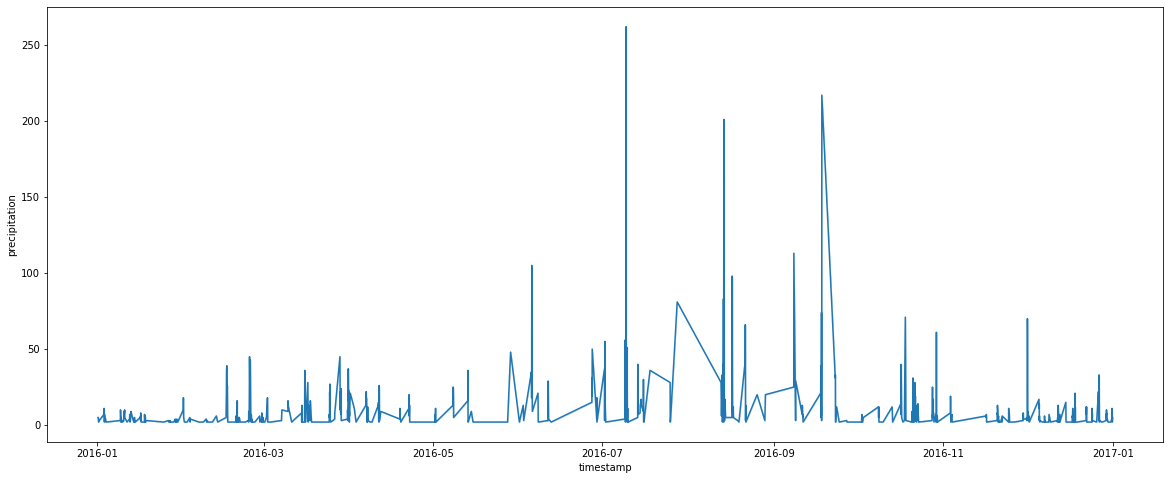

In [90]:
%%time
plt.figure(figsize = (20,8))
sns.lineplot(x = 'timestamp', y = 'precipitation', data = L4525);

## Imputing the null values

**All the null values are in weather related columns, imputing values based on location, can give us more refined values, than just imputing the values using mean/median of the entire data.**

* Tried to use pd.interpolate to fill null values but the data consists of multiple locations, multiple ingradients, multiple farm_ids, so was unable to apply interpolation.  

In [93]:
loc_unique = df['deidentified_location'].unique()
loc_unique

array(['7369', '2532', '5290', '5677', '4525', '868', '7048', '5489',
       '959', '565', '8421', '5150', '6364', '5410', '1784', '5833'],
      dtype=object)

In [94]:
df.isna().sum()

timestamp                      0
farm_id                        0
ingredient_type                0
farm_area                      0
farming_company                0
deidentified_location          0
temp_obs                    6187
cloudiness               8786944
wind_direction           1363996
dew_temp                    9681
pressure_sea_level       1149535
precipitation            3669700
wind_speed                 53331
dtype: int64

In [95]:
df.isna().mean()*100

timestamp                 0.000000
farm_id                   0.000000
ingredient_type           0.000000
farm_area                 0.000000
farming_company           0.000000
deidentified_location     0.000000
temp_obs                  0.030566
cloudiness               43.411258
wind_direction            6.738723
dew_temp                  0.047828
pressure_sea_level        5.679194
precipitation            18.129886
wind_speed                0.263478
dtype: float64

In [96]:
na_cols = list(df.columns[6:])

In [97]:
df.shape

(20241164, 13)

### Replacing all my null values with mean of all observations at a particular location.

* Temperature, cloudiness, wind_direction, dew_temp, pressure_sea_level, precipitation, wind_speed. These weather conditions will be subjective to location. So I am imputing the null values by taking the mean of a particular location.

* I chose mean because I would like to have the impact of even the extreme values while imputing the Null Values.

In [132]:
imputed_values = pd.DataFrame(columns= ['deidentified_location', 'imputed_column', 'imputed_value'])

# saving the dataframe, so that if there are any null values, we can impute them using these values.

In [99]:
%%time

# Atotal of 16*7 = 112 iterations will run in this loop
count = 1
for x in loc_unique:
    for z in df.columns[6:]:
            re = df[(df['deidentified_location'] == x)][z].mean()
            
            df.loc[((df['deidentified_location'] == x)), z]=\
            df.loc[((df['deidentified_location'] == x)), z].fillna(re)
            
            imputed_values = imputed_values.append(pd.Series([x, z, re],index= imputed_values.columns), ignore_index=True)
            print(f'iter: {count}')
            count += 1

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
iter: 7
iter: 8
iter: 9
iter: 10
iter: 11
iter: 12
iter: 13
iter: 14
iter: 15
iter: 16
iter: 17
iter: 18
iter: 19
iter: 20
iter: 21
iter: 22
iter: 23
iter: 24
iter: 25
iter: 26
iter: 27
iter: 28
iter: 29
iter: 30
iter: 31
iter: 32
iter: 33
iter: 34
iter: 35
iter: 36
iter: 37
iter: 38
iter: 39
iter: 40
iter: 41
iter: 42
iter: 43
iter: 44
iter: 45
iter: 46
iter: 47
iter: 48
iter: 49
iter: 50
iter: 51
iter: 52
iter: 53
iter: 54
iter: 55
iter: 56
iter: 57
iter: 58
iter: 59
iter: 60
iter: 61
iter: 62
iter: 63
iter: 64
iter: 65
iter: 66
iter: 67
iter: 68
iter: 69
iter: 70
iter: 71
iter: 72
iter: 73
iter: 74
iter: 75
iter: 76
iter: 77
iter: 78
iter: 79
iter: 80
iter: 81
iter: 82
iter: 83
iter: 84
iter: 85
iter: 86
iter: 87
iter: 88
iter: 89
iter: 90
iter: 91
iter: 92
iter: 93
iter: 94
iter: 95
iter: 96
iter: 97
iter: 98
iter: 99
iter: 100
iter: 101
iter: 102
iter: 103
iter: 104
iter: 105
iter: 106
iter: 107
iter: 108
iter: 109
iter: 110
iter: 11

In [100]:
imputed_values

,deidentified_location,imputed_column,imputed_value
0,7369,temp_obs,23.068507
1,7369,cloudiness,3.048454
2,7369,wind_direction,155.275260
3,7369,dew_temp,17.057623
4,7369,pressure_sea_level,1017.960476
...,...,...,...
107,5833,wind_direction,207.501094
108,5833,dew_temp,9.900293
109,5833,pressure_sea_level,1016.892570
110,5833,precipitation,0.254007


In [101]:
df.isna().sum()

timestamp                      0
farm_id                        0
ingredient_type                0
farm_area                      0
farming_company                0
deidentified_location          0
temp_obs                       0
cloudiness                476901
wind_direction                 0
dew_temp                       0
pressure_sea_level        786013
precipitation            1652917
wind_speed                     0
dtype: int64

In [102]:
df.isna().mean()*100

timestamp                0.000000
farm_id                  0.000000
ingredient_type          0.000000
farm_area                0.000000
farming_company          0.000000
deidentified_location    0.000000
temp_obs                 0.000000
cloudiness               2.356095
wind_direction           0.000000
dew_temp                 0.000000
pressure_sea_level       3.883240
precipitation            8.166116
wind_speed               0.000000
dtype: float64

In [103]:
df[df['cloudiness'].isna()]

,timestamp,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
14154807,2016-01-01 00:00:00,39121,ing_y,48999.922190,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,11.345304,1.5
14154806,2016-01-01 00:00:00,39121,ing_x,48999.922190,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,11.345304,1.5
14154805,2016-01-01 00:00:00,39121,ing_w,48999.922190,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,11.345304,1.5
14154804,2016-01-01 00:00:00,42338,ing_y,37999.928280,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,11.345304,1.5
14154803,2016-01-01 00:00:00,42338,ing_x,37999.928280,Obery Farms,4525,-1.8,NaN,280.0,-3.2,1016.0,11.345304,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508237,2016-12-31 23:00:00,65870,ing_x,5999.954449,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.000000,4.1
14508236,2016-12-31 23:00:00,65870,ing_w,5999.954449,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.000000,4.1
14508235,2016-12-31 23:00:00,39121,ing_y,48999.922190,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.000000,4.1
14508234,2016-12-31 23:00:00,39121,ing_x,48999.922190,Obery Farms,4525,-9.6,NaN,70.0,-10.8,1004.7,5.000000,4.1


In [104]:
print(df[df['cloudiness'].isna()]['deidentified_location'].value_counts())

4525    359642
868     117259
Name: deidentified_location, dtype: int64


In [105]:
print(df[df['pressure_sea_level'].isna()]['deidentified_location'].value_counts())

6364    786013
Name: deidentified_location, dtype: int64


In [106]:
print(df[df['precipitation'].isna()]['deidentified_location'].value_counts())

6364    786013
959     552034
7048    314870
Name: deidentified_location, dtype: int64


##### Checking what percentage of each column at a particular location and for a particular ingradient

In [107]:
null_locs = ['6364', '7048', '959', '868', '4525']

for x in null_locs:
    print(f"{round(len(df[df['deidentified_location'] == x])/len(df) *100,3)}% of the total observations are in location '{x}' \n")
    print(f"Percentage of null values of all the observations at location '{x}'")    
    print(df[df['deidentified_location'] == x][['cloudiness', 'pressure_sea_level', 'precipitation']].isna().mean()*100)
    print('*********************************\n')
    

3.883% of the total observations are in location '6364' 

Percentage of null values of all the observations at location '6364'
cloudiness              0.0
pressure_sea_level    100.0
precipitation         100.0
dtype: float64
*********************************

1.556% of the total observations are in location '7048' 

Percentage of null values of all the observations at location '7048'
cloudiness              0.0
pressure_sea_level      0.0
precipitation         100.0
dtype: float64
*********************************

2.727% of the total observations are in location '959' 

Percentage of null values of all the observations at location '959'
cloudiness              0.0
pressure_sea_level      0.0
precipitation         100.0
dtype: float64
*********************************

0.579% of the total observations are in location '868' 

Percentage of null values of all the observations at location '868'
cloudiness            100.0
pressure_sea_level      0.0
precipitation           0.0
dtype: flo

### In different combinations of ingradient_type and deidentified_location, some of the combinations has entire null values for cloudiness.

* I am replacing those null values with the average temperature based on ingradients, because we have more data on ingredients, compared location, the mean value of that ingredient can have better information.

In [108]:
sum(df.loc[(df['deidentified_location'] == '6364'), 'cloudiness'].isna()) > 0

False

In [109]:
%%time

# I am using only ['cloudiness', 'pressure_sea_level', 'precipitation'] because there are no null values at other locations
count = 1
for x in ['6364', '7048', '959', '868', '4525']:
    for y in ['cloudiness', 'pressure_sea_level', 'precipitation']:
            
            if sum(df.loc[(df['deidentified_location'] == x), y].isna()) > 0:
            
                re = df[y].mean()
            
                df.loc[(df['deidentified_location'] == x), y] = df.loc[(df['deidentified_location'] == x), y].fillna(re)
            
                imputed_values = imputed_values.append(pd.Series([x, y, re],index= imputed_values.columns), ignore_index=True)
            
                     
                print(f'iter: {count}')
                count += 1

iter: 1
iter: 2
iter: 3
iter: 4
iter: 5
iter: 6
Wall time: 1min 5s


In [110]:
imputed_values

,deidentified_location,imputed_column,imputed_value
0,7369,temp_obs,23.068507
1,7369,cloudiness,3.048454
2,7369,wind_direction,155.275260
3,7369,dew_temp,17.057623
4,7369,pressure_sea_level,1017.960476
...,...,...,...
113,6364,precipitation,1.265612
114,7048,precipitation,1.265612
115,959,precipitation,1.265612
116,868,cloudiness,1.835310


**Removing the rows which are having nulls, they won't be of any help while imputing.**

In [111]:
null_rows_bool = pd.isnull(imputed_values['imputed_value'])
imputed_values[null_rows_bool]

,deidentified_location,imputed_column,imputed_value
29,4525,cloudiness,NaN
36,868,cloudiness,NaN
47,7048,precipitation,NaN
61,959,precipitation,NaN
88,6364,pressure_sea_level,NaN
89,6364,precipitation,NaN


In [112]:
null_rows = imputed_values[null_rows_bool].index
null_rows

Int64Index([29, 36, 47, 61, 88, 89], dtype='int64')

In [113]:
imputed_values.drop(null_rows, axis = 0, inplace = True)
imputed_values

,deidentified_location,imputed_column,imputed_value
0,7369,temp_obs,23.068507
1,7369,cloudiness,3.048454
2,7369,wind_direction,155.275260
3,7369,dew_temp,17.057623
4,7369,pressure_sea_level,1017.960476
...,...,...,...
113,6364,precipitation,1.265612
114,7048,precipitation,1.265612
115,959,precipitation,1.265612
116,868,cloudiness,1.835310


In [114]:
df.isna().sum()

timestamp                0
farm_id                  0
ingredient_type          0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
dtype: int64

In [115]:
#df.to_csv('imputed_data.csv', index=False)

### A few visualizations after imputation.

In [116]:
%%time

L4525 = df[(df['deidentified_location'] == '4525')]
L4525

Wall time: 2.76 s


,timestamp,farm_id,ingredient_type,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
14154807,2016-01-01 00:00:00,39121,ing_y,48999.922190,Obery Farms,4525,-1.8,1.83531,280.0,-3.2,1016.0,11.345304,1.5
14154806,2016-01-01 00:00:00,39121,ing_x,48999.922190,Obery Farms,4525,-1.8,1.83531,280.0,-3.2,1016.0,11.345304,1.5
14154805,2016-01-01 00:00:00,39121,ing_w,48999.922190,Obery Farms,4525,-1.8,1.83531,280.0,-3.2,1016.0,11.345304,1.5
14154804,2016-01-01 00:00:00,42338,ing_y,37999.928280,Obery Farms,4525,-1.8,1.83531,280.0,-3.2,1016.0,11.345304,1.5
14154803,2016-01-01 00:00:00,42338,ing_x,37999.928280,Obery Farms,4525,-1.8,1.83531,280.0,-3.2,1016.0,11.345304,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14508237,2016-12-31 23:00:00,65870,ing_x,5999.954449,Obery Farms,4525,-9.6,1.83531,70.0,-10.8,1004.7,5.000000,4.1
14508236,2016-12-31 23:00:00,65870,ing_w,5999.954449,Obery Farms,4525,-9.6,1.83531,70.0,-10.8,1004.7,5.000000,4.1
14508235,2016-12-31 23:00:00,39121,ing_y,48999.922190,Obery Farms,4525,-9.6,1.83531,70.0,-10.8,1004.7,5.000000,4.1
14508234,2016-12-31 23:00:00,39121,ing_x,48999.922190,Obery Farms,4525,-9.6,1.83531,70.0,-10.8,1004.7,5.000000,4.1


Wall time: 11.3 s


<AxesSubplot:>

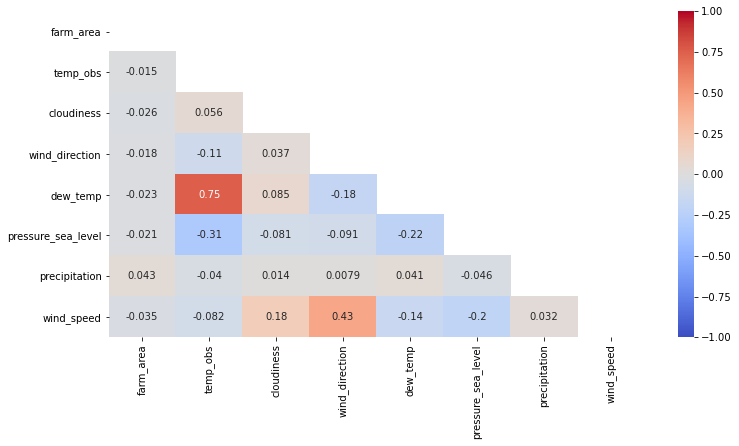

In [117]:
%%time

cm = df.corr()
mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(12,6))
sns.heatmap(cm,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True,
            mask = mask);

Wall time: 6min 21s


<AxesSubplot:xlabel='timestamp', ylabel='cloudiness'>

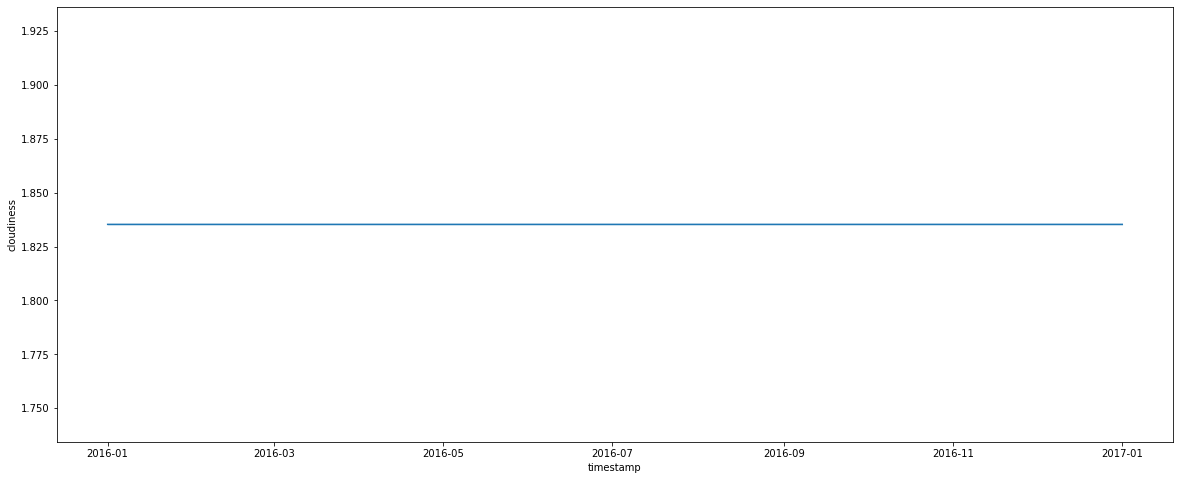

In [118]:
%%time
plt.figure(figsize = (20,8))
sns.lineplot(x = 'timestamp', y = 'cloudiness', data = L4525);

Wall time: 6min 17s


<AxesSubplot:xlabel='timestamp', ylabel='precipitation'>

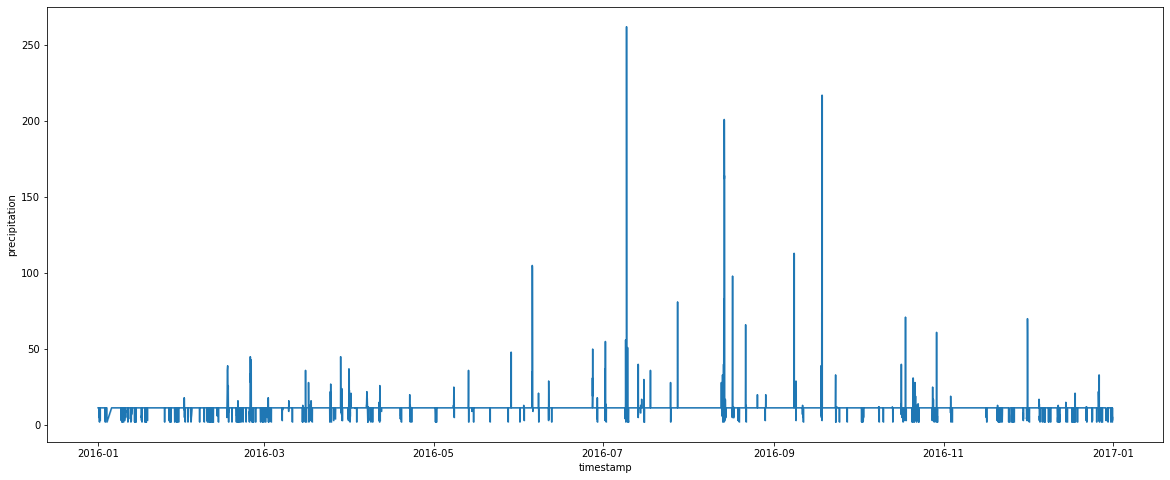

In [119]:
%%time
plt.figure(figsize = (20,8))
sns.lineplot(x = 'timestamp', y = 'precipitation', data = L4525);

Wall time: 6min 16s


<AxesSubplot:xlabel='timestamp', ylabel='dew_temp'>

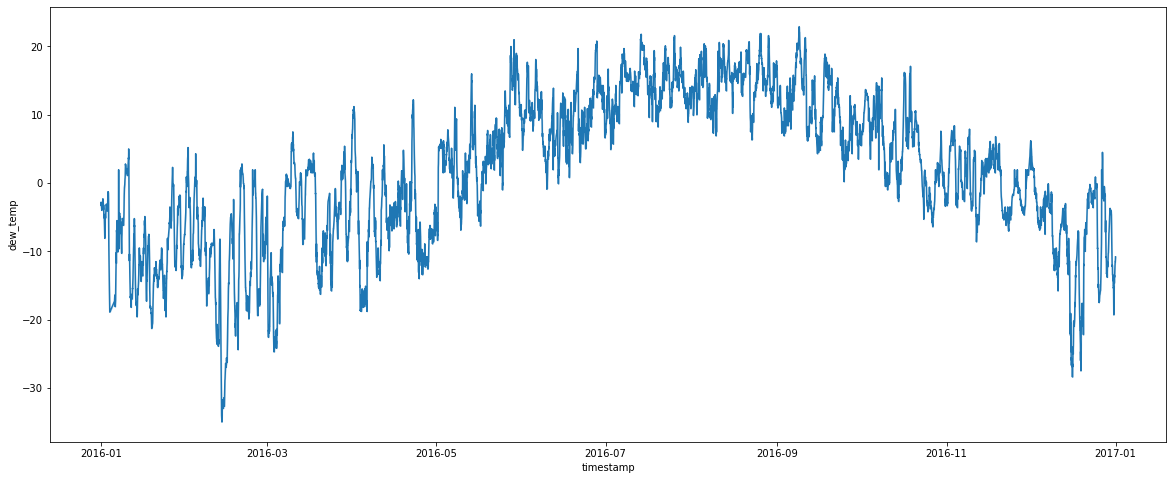

In [120]:
%%time
plt.figure(figsize = (20,8))
sns.lineplot(x = 'timestamp', y = 'dew_temp', data = L4525);

**There is some difference in the plots after imputation.**

### Splitting the date into month, year, day and hour

In [121]:
%%time


df['year'] = df['timestamp'].dt.year

df['month']=df['timestamp'].dt.month

df['date'] = df['timestamp'].dt.day

df['hour'] = df['timestamp'].dt.hour

Wall time: 10.9 s


In [122]:
print(df.year.unique())
print('\n')
print(df.month.unique())
print('\n')
print(df.date.unique())
print('\n')
print(df.hour.unique())

[2016]


[ 1  2  3  4  5  6  7  8  9 10 11 12]


[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31]


[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23]


In [123]:
df.drop('year', axis = 1, inplace = True)

In [124]:
df.isna().sum()

timestamp                0
farm_id                  0
ingredient_type          0
farm_area                0
farming_company          0
deidentified_location    0
temp_obs                 0
cloudiness               0
wind_direction           0
dew_temp                 0
pressure_sea_level       0
precipitation            0
wind_speed               0
month                    0
date                     0
hour                     0
dtype: int64

In [125]:
df.dtypes

timestamp                datetime64[ns]
farm_id                          object
ingredient_type                  object
farm_area                       float64
farming_company                  object
deidentified_location            object
temp_obs                        float64
cloudiness                      float64
wind_direction                  float64
dew_temp                        float64
pressure_sea_level              float64
precipitation                   float64
wind_speed                      float64
month                             int64
date                              int64
hour                              int64
dtype: object

In [126]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
farm_area,20241164.0,9984.825177,10869.717567,26.291549,2996.679168,6706.946279,12911.380230,81290.125
temp_obs,20241164.0,15.978543,10.947089,-28.900000,8.500000,16.700000,23.900000,47.200
cloudiness,20241164.0,1.835310,1.984972,0.000000,0.000000,1.835310,2.873384,9.000
wind_direction,20241164.0,170.783550,110.727901,0.000000,80.000000,170.000000,270.000000,360.000
dew_temp,20241164.0,7.740385,10.177370,-35.000000,0.000000,8.900000,16.100000,26.100
pressure_sea_level,20241164.0,1016.098153,6.858970,968.200000,1011.900000,1016.098153,1020.200000,1045.500
precipitation,20241164.0,1.265612,6.956972,-1.000000,0.000000,0.000000,0.000000,343.000
wind_speed,20241164.0,3.377498,2.263978,0.000000,2.100000,3.100000,4.600000,19.000
month,20241164.0,6.583073,3.435831,1.000000,4.000000,7.000000,10.000000,12.000
date,20241164.0,15.772572,8.819484,1.000000,8.000000,16.000000,23.000000,31.000


In [127]:
df.describe(include=['object', 'datetime64[ns]'])

,timestamp,farm_id,ingredient_type,farming_company,deidentified_location
count,20241164,20241164,20241164,20241164,20241164
unique,8784,1434,4,16,16
top,2016-12-27 22:00:00,63700,ing_w,Obery Farms,2532
freq,2383,70178,12027434,8163691,2746587
first,2016-01-01 00:00:00,NaN,NaN,NaN,NaN
last,2016-12-31 23:00:00,NaN,NaN,NaN,NaN


Wall time: 1.46 s


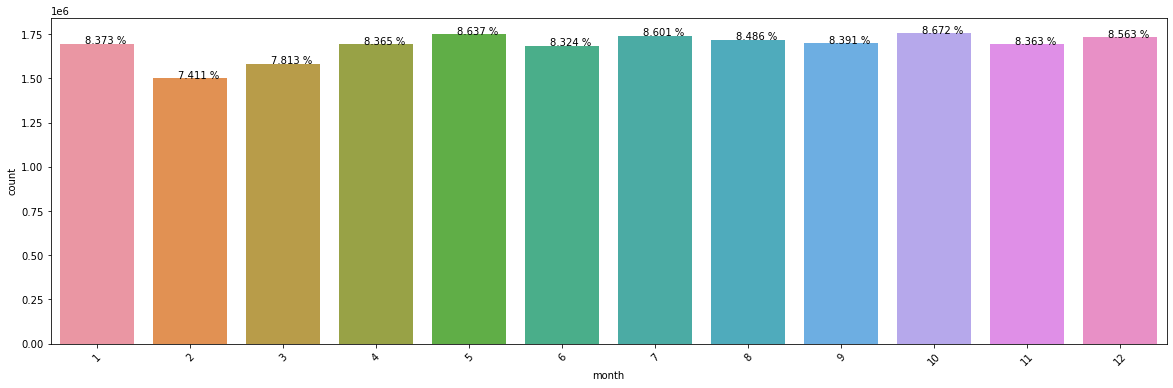

In [136]:
%%time

barplot('month', df)

Wall time: 1.7 s


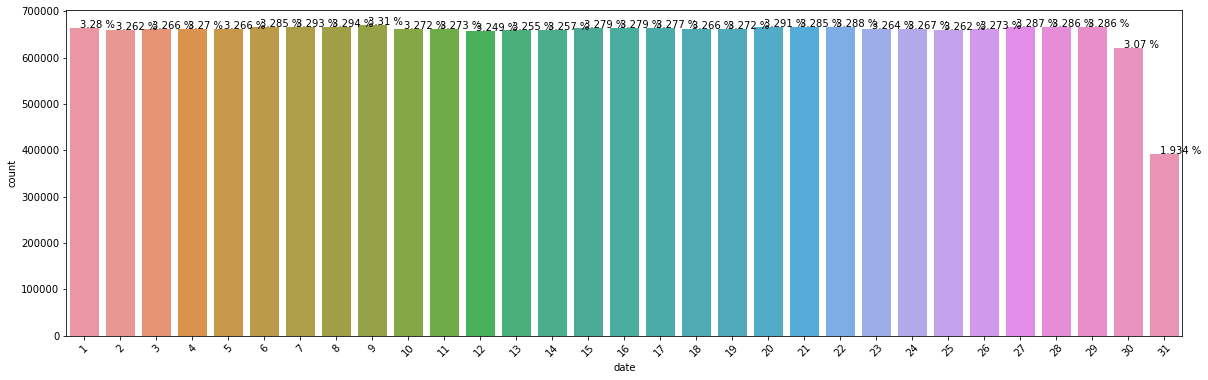

In [137]:
%%time

barplot('date', df)

Wall time: 2.48 s


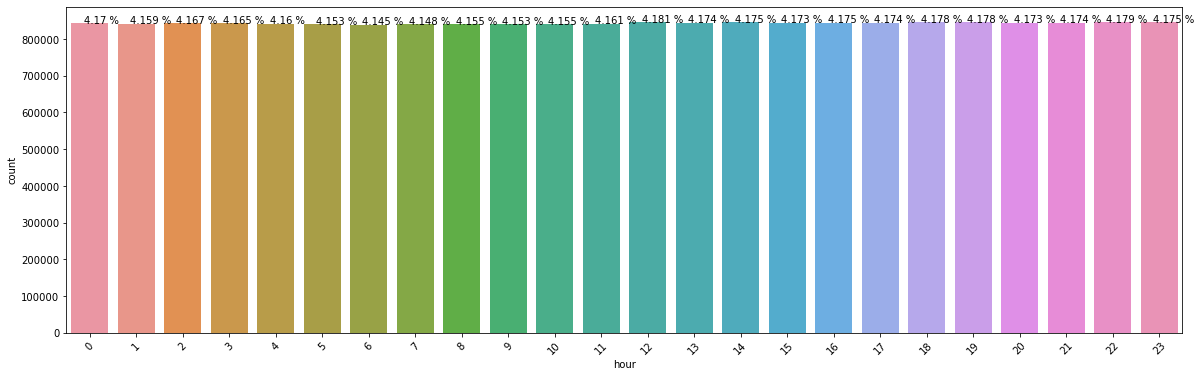

In [134]:
%%time

barplot('hour', df)

**It shows that the data is evenly distributed across the time.** 

### Saving dataframes for future purposes.

In [133]:
#imputed_values.to_csv('imputed_values.csv', index = False)

In [129]:
#df.to_csv('new_imputed_data.csv', index=False)